# pandas 모듈: 데이터구조 Data Frame

## 사전을 이용한 dataframe 생성
dict와 잘 맞는다.

In [89]:
import pandas as pd

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year' : [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
pd.DataFrame(data)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [90]:
pd.DataFrame(data, columns = ['pop', 'year', 'state'],
             index = ['one', 'two', 'three', 'four', 'five'])

,pop,year,state
one,1.5,2000,Ohio
two,1.7,2001,Ohio
three,3.6,2002,Ohio
four,2.4,2001,Nevada
five,2.9,2002,Nevada


## column 다루기
- 하나의 column은 하나의 series(dtype)가 된다.
- 컬럼에 해당하는 값이 없으면 NaN으로 채워진다.

In [91]:
a = pd.DataFrame(data, columns=['pop', 'year', 'state', 'debt'],
                index=['one', 'two', 'three', 'four', 'five']); a

,pop,year,state,debt
one,1.5,2000,Ohio,NaN
two,1.7,2001,Ohio,NaN
three,3.6,2002,Ohio,NaN
four,2.4,2001,Nevada,NaN
five,2.9,2002,Nevada,NaN


In [92]:
a['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [93]:
a.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [94]:
a.debt = 16.5; a

,pop,year,state,debt
one,1.5,2000,Ohio,16.5
two,1.7,2001,Ohio,16.5
three,3.6,2002,Ohio,16.5
four,2.4,2001,Nevada,16.5
five,2.9,2002,Nevada,16.5


In [95]:
a['debt'] = range(5); a

,pop,year,state,debt
one,1.5,2000,Ohio,0
two,1.7,2001,Ohio,1
three,3.6,2002,Ohio,2
four,2.4,2001,Nevada,3
five,2.9,2002,Nevada,4


In [96]:
a['debt'] = pd.Series([-1.2, -3, -2], 
                        index=['four', 'two', 'one']); a

,pop,year,state,debt
one,1.5,2000,Ohio,-2.0
two,1.7,2001,Ohio,-3.0
three,3.6,2002,Ohio,NaN
four,2.4,2001,Nevada,-1.2
five,2.9,2002,Nevada,NaN


In [97]:
a.eastern = a.state; a # 이제 이 방식은 안 될 예정이다. 실제로 반영 안 됨!

C:\Users\yunji\AppData\Local\Temp\ipykernel_25780\623308426.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  a.eastern = a.state; a # 이제 이 방식은 안 될 예정이다. 실제로 반영 안 됨!


,pop,year,state,debt
one,1.5,2000,Ohio,-2.0
two,1.7,2001,Ohio,-3.0
three,3.6,2002,Ohio,NaN
four,2.4,2001,Nevada,-1.2
five,2.9,2002,Nevada,NaN


In [98]:
a['eastern'] = a.state; a # 안전하게 이걸 쓰자!

,pop,year,state,debt,eastern
one,1.5,2000,Ohio,-2.0,Ohio
two,1.7,2001,Ohio,-3.0,Ohio
three,3.6,2002,Ohio,NaN,Ohio
four,2.4,2001,Nevada,-1.2,Nevada
five,2.9,2002,Nevada,NaN,Nevada


In [99]:
del a['eastern']; a

,pop,year,state,debt
one,1.5,2000,Ohio,-2.0
two,1.7,2001,Ohio,-3.0
three,3.6,2002,Ohio,NaN
four,2.4,2001,Nevada,-1.2
five,2.9,2002,Nevada,NaN


## 연습문제 1

In [100]:
import numpy as np

None 대신 np.nan을 사용해도 된다.

In [101]:
a = pd.DataFrame({'Nevada': [2.4, 2.9, None], 'Ohio':[3.2, 2.1, 1.9]},
                index=[2001, 2003, 2002]); a

,Nevada,Ohio
2001,2.4,3.2
2003,2.9,2.1
2002,NaN,1.9


## 연습문제 2

In [102]:
a['Utah'] = [3.3, 3.1, 3.2]; a

,Nevada,Ohio,Utah
2001,2.4,3.2,3.3
2003,2.9,2.1,3.1
2002,NaN,1.9,3.2


## 사전 이용 인덱스와 dataframe 생성

- 하나의 컬럼은 하나의 시리즈로 구성된다.
- 따라서 시리즈를 구성할 수 있는 dict를 활용할 수 있다.
- 이때 빈 값은 자동으로 NaN으로 채워진다.
- 순서대로 인덱스가 쌓인다.


{'컬럼명':{index1:값1, index2:값2}}

In [103]:
pd.DataFrame({'Nevada':{2001:2.4, 2003:2.9},
                'Ohio':{2003:2.1, 2002:1.9, 2001:3.2}})

,Nevada,Ohio
2001,2.4,3.2
2003,2.9,2.1
2002,NaN,1.9


## 인덱스 순서 변경

In [104]:
pd.DataFrame(a, index=[2003, 2001, 2002])

,Nevada,Ohio,Utah
2003,2.9,2.1,3.1
2001,2.4,3.2,3.3
2002,NaN,1.9,3.2


In [105]:
pd.DataFrame(a, index=[2003, 2002])

,Nevada,Ohio,Utah
2003,2.9,2.1,3.1
2002,NaN,1.9,3.2


## 행렬 전환

In [106]:
a.T

,2001,2003,2002
Nevada,2.4,2.9,NaN
Ohio,3.2,2.1,1.9
Utah,3.3,3.1,3.2


## index, columns, values

In [107]:
type(a)

pandas.core.frame.DataFrame

In [108]:
a.index

Index([2001, 2003, 2002], dtype='int64')

In [109]:
type(a.index)

pandas.core.indexes.base.Index

In [110]:
a.columns

Index(['Nevada', 'Ohio', 'Utah'], dtype='object')

In [111]:
type(a.columns)

pandas.core.indexes.base.Index

In [112]:
a.values

array([[2.4, 3.2, 3.3],
       [2.9, 2.1, 3.1],
       [nan, 1.9, 3.2]])

## name

In [113]:
a.index.name = 'year'; a

,Nevada,Ohio,Utah
year,,,
2001,2.4,3.2,3.3
2003,2.9,2.1,3.1
2002,NaN,1.9,3.2


In [114]:
a.index.name

'year'

In [115]:
a.columns.name = 'state'; a

state,Nevada,Ohio,Utah
year,,,
2001,2.4,3.2,3.3
2003,2.9,2.1,3.1
2002,NaN,1.9,3.2


In [116]:
a.columns.name

'state'

## 연습문제 3

In [147]:
import pandas as pd
a = pd.DataFrame({'서울':{'인구':'1000만', '여성':'510만'},
                    '부산':{'인구':'350만'},
                    '경기':{'인구':'1300만', '남성':'650만'}}); a

,서울,부산,경기
인구,1000만,350만,1300만
여성,510만,NaN,NaN
남성,NaN,NaN,650만


## 연습문제 4

In [148]:
# 교수님 코드
b = pd.DataFrame(a, index=['여성', '남성', '인구'])
b.index.name = '인구구성'
b.columns.name = '지역'
b.T

인구구성,여성,남성,인구
지역,,,
서울,510만,NaN,1000만
부산,NaN,NaN,350만
경기,NaN,650만,1300만


In [149]:
# 내 코드
a = a.T
a = pd.DataFrame(a, columns=['여성', '남성', '인구'])
a.columns.name = '인구구성'
a.index.name = '지역'
a

인구구성,여성,남성,인구
지역,,,
서울,510만,NaN,1000만
부산,NaN,NaN,350만
경기,NaN,650만,1300만


## drop: Series

In [157]:
a = pd.Series(np.arange(5.), list('abcde')); a

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [154]:
del a['a']; a

b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [155]:
a.drop('c')

b    1.0
d    3.0
e    4.0
dtype: float64

In [156]:
a.drop(['e', 'd'])

b    1.0
c    2.0
dtype: float64

## drop: DataFrame

In [162]:
b = pd.DataFrame(np.arange(16).reshape(4, 4), 
                    columns=['A', 'B', 'C', 'D'],
                    index=['a', 'b', 'c', 'd']); b

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [163]:
b.drop(['a', 'c'])

,A,B,C,D
b,4,5,6,7
d,12,13,14,15


In [164]:
b.drop(['A', 'C'], axis=1)

,B,D
a,1,3
b,5,7
c,9,11
d,13,15


In [165]:
b.drop(['a', 'c'], axis=0)

,A,B,C,D
b,4,5,6,7
d,12,13,14,15


## DataFrame: indexing, slicing

In [166]:
b

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [167]:
b['B']

a     1
b     5
c     9
d    13
Name: B, dtype: int64

In [168]:
b[0]

KeyError: 0

In [169]:
b[0:1]

,A,B,C,D
a,0,1,2,3


In [170]:
b['a':'b']

,A,B,C,D
a,0,1,2,3
b,4,5,6,7


In [171]:
b['A']

a     0
b     4
c     8
d    12
Name: A, dtype: int64

In [172]:
b[['A']]

,A
a,0
b,4
c,8
d,12


In [173]:
b[['A', 'D']]

,A,D
a,0,3
b,4,7
c,8,11
d,12,15


In [174]:
b[['A':'D']]

SyntaxError: invalid syntax (170243887.py, line 1)

## loc

fancy indexing은 차원을 변경하지 못함.
인덱싱은 차원을 바꾸고
슬라이싱은 바꾸지 못한다.

In [175]:
b

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [176]:
b.loc['a']

A    0
B    1
C    2
D    3
Name: a, dtype: int64

In [177]:
b.loc['a', 'B']

np.int64(1)

In [178]:
b.loc['a', 'B':'C']

B    1
C    2
Name: a, dtype: int64

In [179]:
b.loc[:, 'B']

a     1
b     5
c     9
d    13
Name: B, dtype: int64

In [180]:
b.loc['a':'b', 'B':'C']

,B,C
a,1,2
b,5,6


In [181]:
b.loc[['a'], ['B']]

,B
a,1


## iloc

In [182]:
b

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [183]:
b.iloc[0]

A    0
B    1
C    2
D    3
Name: a, dtype: int64

In [184]:
b.iloc[0, 1]

np.int64(1)

In [185]:
b.iloc[:, 1]

a     1
b     5
c     9
d    13
Name: B, dtype: int64

In [186]:
b.iloc[0:1, 1:2]

,B
a,1


In [187]:
b.iloc[[0], [1]]

,B
a,1


## DataFrame과 조건 검색

In [188]:
b[b.B > 4]

,A,B,C,D
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [189]:
b[(b.B > 5) & (b.C > 6)]

,A,B,C,D
c,8,9,10,11
d,12,13,14,15


In [190]:
b.loc[b.B > 4, 'B':'C']

,B,C
b,5,6
c,9,10
d,13,14


In [191]:
b.iloc[b.B > 4, :]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

## concat

In [194]:
b

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [198]:
pd.concat([b.iloc[0:1, 0:3], b.iloc[0:2, 1:]])

,A,B,C,D
a,0.0,1,2,NaN
a,NaN,1,2,3.0
b,NaN,5,6,7.0


In [199]:
pd.concat([b.iloc[0:1, 0:3], b.iloc[0:2, 1:]], axis=1)

,A,B,C,B,C,D
a,0.0,1.0,2.0,1,2,3
b,NaN,NaN,NaN,5,6,7


## DataFrame 파일 저장

In [228]:
b = pd.DataFrame({'A':{'a':0, 'b':6, 'c':2},
                    'B':{'a':6, 'b':2, 'c':5},
                    'C':{'a':7, 'b':5, 'c':8}}); b

,A,B,C
a,0,6,7
b,6,2,5
c,2,5,8


In [229]:
b.to_csv('DF.txt', sep='\t')

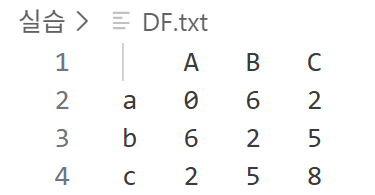

## 파일을 DataFrame으로 불러오기

In [230]:
DF = pd.read_csv('DF.txt', sep='\t', index_col=0)
DF

,A,B,C
a,0,6,7
b,6,2,5
c,2,5,8


## DaraFrame 연산

In [231]:
DF['AA'] = [6, 0, 2]; DF

,A,B,C,AA
a,0,6,7,6
b,6,2,5,0
c,2,5,8,2


In [232]:
DF.iloc[::-2, ::-2]

,AA,B
c,2,5
a,6,6


In [233]:
DF.iloc[::-2, ::-2] + DF

,A,AA,B,C
a,NaN,12.0,12.0,NaN
b,NaN,NaN,NaN,NaN
c,NaN,4.0,10.0,NaN


In [234]:
DF.iloc[::-2, ::-2].add(DF, fill_value=0)

,A,AA,B,C
a,0.0,12.0,12.0,7.0
b,6.0,0.0,2.0,5.0
c,2.0,4.0,10.0,8.0


## 기술통계: 수치 척도
IQR(Interquartile range)은 직접 계산해서 써야 한다.

In [235]:
DF.describe()

,A,B,C,AA
count,3.000000,3.000000,3.000000,3.000000
mean,2.666667,4.333333,6.666667,2.666667
std,3.055050,2.081666,1.527525,3.055050
min,0.000000,2.000000,5.000000,0.000000
25%,1.000000,3.500000,6.000000,1.000000
50%,2.000000,5.000000,7.000000,2.000000
75%,4.000000,5.500000,7.500000,4.000000
max,6.000000,6.000000,8.000000,6.000000


In [236]:
type(DF.describe())

pandas.core.frame.DataFrame

In [237]:
DF.mean()

A     2.666667
B     4.333333
C     6.666667
AA    2.666667
dtype: float64

In [238]:
DF.mean(axis=1)

a    4.75
b    3.25
c    4.25
dtype: float64

In [239]:
DF.describe().loc['50%']

A     2.0
B     5.0
C     7.0
AA    2.0
Name: 50%, dtype: float64

In [240]:
DF.describe().loc['75%'].sub(DF.describe().loc['25%'])

A     3.0
B     2.0
C     1.5
AA    3.0
dtype: float64

## 기술통계: 명목 척도(문자열/범주형)

In [243]:
data = {
    'A': ['orange', 'banana', 'orange', 'orange', 'nan'],
    'B': ['apple', 'banana', 'banana', 'apple', 'banana'],
    'C': ['orange', 'apple', 'orange', 'orange', 'banana']
}

a = pd.DataFrame(data, index=['a','b','c','d','e']); a

,A,B,C
a,orange,apple,orange
b,banana,banana,apple
c,orange,banana,orange
d,orange,apple,orange
e,nan,banana,banana


In [244]:
a.describe()

,A,B,C
count,5,5,5
unique,3,2,3
top,orange,banana,orange
freq,3,3,3
